# Outliers

Mean, median, and mode generally measure the center of the data. But data do not always fall even around the centre point. Sometimes the majority of the data hovers towards higher or lower values. Sometimes the outliers influence the measures a little too much. In these cases, the data is skewed from the center.

A data point that lies outside the overall distribution of the dataset.

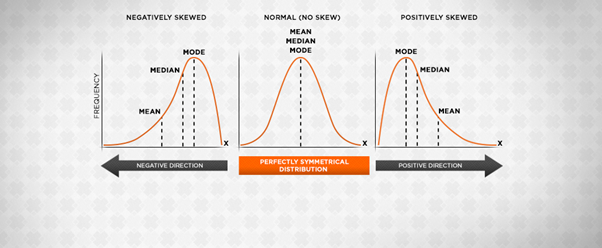

#### What are the criteria to identify an outlier?
 - Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile.
 - Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

#### Which Machine Learning algorithm are Sensitive To Outliers?
    1. Linear Regression ----------------------> Sensitive to outliers
    2. Logistic Regression --------------------> Sensitive to outliers
    3. SVM ------------------------------------> Not Sensitive to outliers          
    4. KNN ------------------------------------> Not Sensitive to outliers
    5. Naivye Bayes Classifier ----------------> Not Sensitive to outliers
    6. Decision Tree Regressor or Classifier --> Not Sensitive to outliers
    7. Ensemble(RF,XGboost,GB)-----------------> Not Sensitive to outliers
    8. Kmeans----------------------------------> Sensitive to outliers
    9. Hierarichal-----------------------------> Sensitive to outliers
    10. PCA------------------------------------> Sensitive to outliers
    11. Neural Networks------------------------> Sensitive to outliers


#### What are the impacts of having outliers in a dataset?
- It causes various problems during our statistical analysis
- It may cause a significant impact on the mean and the standard deviation


#### Various ways of finding the outlier.
1. Using scatter plot or distplot
2. Box plot
3. using the IQR interquantile range
4. using z score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Lets find the outliers using distplot.

In [3]:
df['Age'].isnull().sum()

177

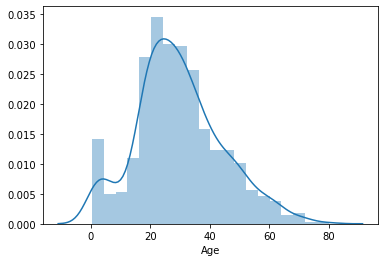

In [4]:
# considering the Age feature to get the understanding of outliers.
import seaborn as sns
sns.distplot(df['Age'])

Observation: As we can see in this above graph is looks like the normal distribution there is no outliers in this feature. let do something add into it to understanding the outliers thing. There is  some null values in this feature, just replaceing with outlier value like 100. and then see the graph

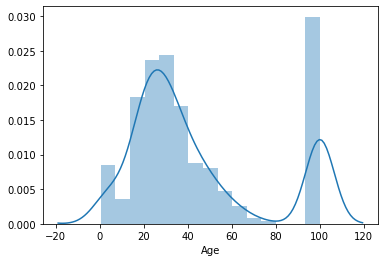

In [5]:
sns.distplot(df.Age.fillna(100))

#### Observation : Heare we can see the outliers in our graprh at the age of 100 with the help of distplot.

## Now we will see the outliers by using the boxplot


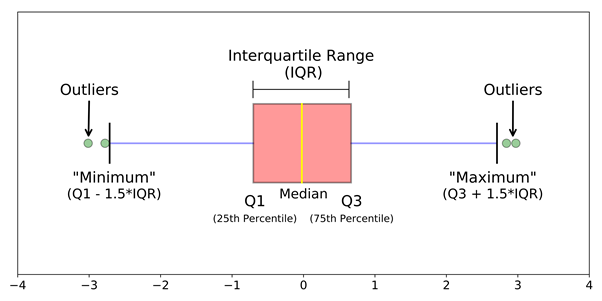

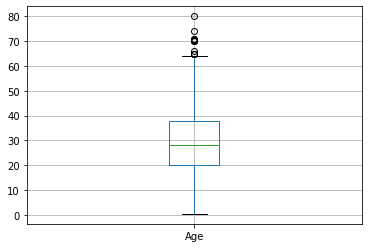

In [6]:
# let's see the age feature without replacing the null values
df.boxplot(column='Age')

Observation: Here we cann see there is some outliers in Age features those can be handel by using Interquantile range and Z-score.

##### Note: with the help of distplot and boxplot we can see the outliers but to handeling outliers we will use Interquantile range or z-score. Let's see how both work for our dataset.

## Interquantile range and z-score

First we will see Interquantile range to handeling the outliers. the way of finding outliers are different for Gaussion distributed dataset and skewed datset. let's look at both.

## Interquantile Range

#### If The Data Is Normally Distributed:

Text(0, 0.5, 'No of passenger')

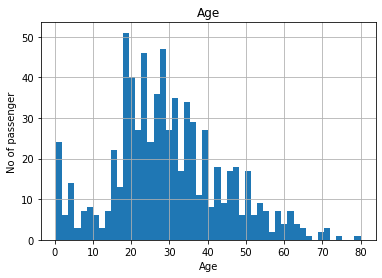

In [7]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

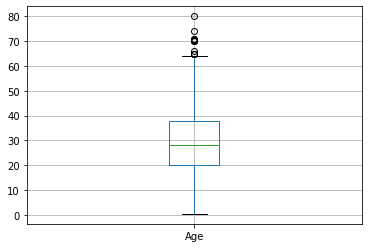

In [8]:
# Boxplot
figure=df.boxplot(column="Age")

In [9]:
df['Age'].describe()  # it will tell mean,std,quantile and many things about the datset

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

#### If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

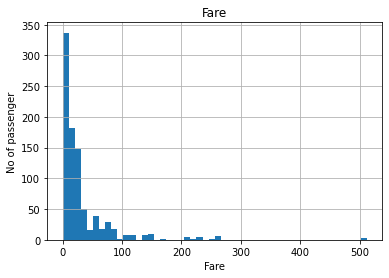

In [11]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

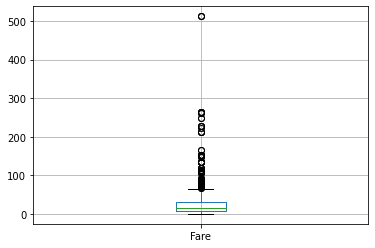

In [12]:
df.boxplot(column="Fare")

In [13]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
# lets find the quantiles to get the interquantile range (Q3-Q1)
print('Q1 is', df['Fare'].quantile(0.25))
print('Q3 is', df['Fare'].quantile(0.75))

Q1 is 7.9104
Q3 is 31.0


In [15]:
# Lets find the Interquantile range to calculate the boundaries
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
IQR

23.0896

In [16]:
LowerBoundary = df['Fare'].quantile(0.25)-(IQR*1.5) # this 1.5 value can be anything, its depend on the domain person.
UpperBoundary = df['Fare'].quantile(0.75)+(IQR*1.5)

In [17]:
print(LowerBoundary), print(UpperBoundary),print(df['Fare'].mean())

-26.724
65.6344
32.204207968574636


(None, None, None)

In [18]:
# lets see the extreme boundries
LowerBoundary = df['Fare'].quantile(0.25)-(IQR*3) 
UpperBoundary = df['Fare'].quantile(0.75)+(IQR*3)
print(LowerBoundary), print(UpperBoundary),print(df['Fare'].mean())

-61.358399999999996
100.2688
32.204207968574636


(None, None, None)

In [19]:
data=df.copy()

#### Handeling Outliers

In [20]:
# replacing all outliers to lower/upper boundries
data.loc[data['Age']>=73,'Age']=73
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

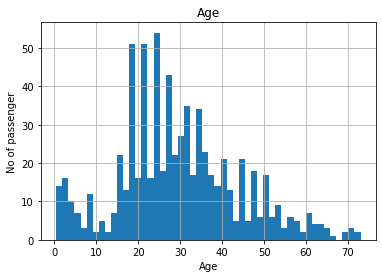

In [21]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

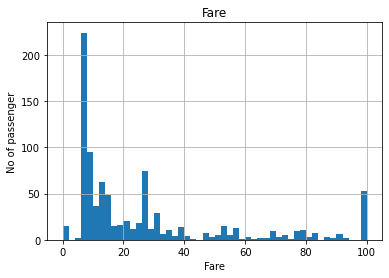

In [22]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [24]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6940298507462687
roc_auc_score: 0.6917090600775194


## Z-Score

In [25]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df['Age'].fillna(np.mean(df['Age']), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Detecting outlier using Z score
##### Using Z score
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [28]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [29]:
detect_outliers(df['Age'])

[71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]

In [30]:
detect_outliers(df['Fare'])

[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

#### Handeling Outliers

In [31]:
# replacing all outliers to lower/upper boundries
df.loc[df['Age']>=70,'Age']=70
df.loc[df['Fare']>=211,'Fare']=211

Text(0, 0.5, 'No of passenger')

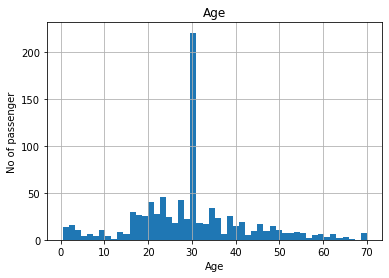

In [32]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

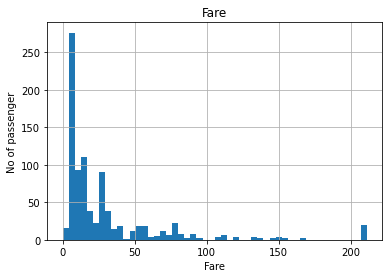

In [33]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.3)

In [35]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.7089552238805971
roc_auc_score: 0.6977452221619341
